### 1. Load the Dataset 

##### Import the Libraries
* **import pandas as pd** :
This imports the pandas library and assigns it the alias pd.
* **import networkx as nx** :
This imports the networkx library and assigns it the alias nx

In [1]:
import pandas as pd
import networkx as nx

##### Load the dataset

In [3]:
df = pd.read_csv('FashionDataset.csv')
df.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


##### Create the graph

In [13]:
G = nx.Graph()

##### Adding edges to the graph
This process builds a graph where nodes represent brands and categories, and edges represent the associations between them, allowing for further analysis or visualization.

In [16]:
for _, row in df.iterrows():
    if not pd.isna(row['BrandName']) and not pd.isna(row['Category']):
        G.add_node(row['BrandName'])
        G.add_node(row['Category'])
        G.add_edge(row['BrandName'], row['Category'])

##### Basis of Community Formation:
**Brand and Category Relationships** : The communities in the graph are formed based on **how closely related different BrandName and Category nodes are to each other**. If a brand frequently appears in multiple categories, or if certain categories are closely linked to a specific set of brands, these nodes are likely to be grouped into the same community.

### 2. Apply the Louvain Algorithm

* The Louvain algorithm seeks to maximize modularity, a measure of the density of links inside communities compared to links between communities.

##### Import the Libraries
* **import community as community_louvain** :
Used for community detection in graphs.
* **import matplotlib.pyplot as plt** :
A popular Python library for creating static, interactive, and animated visualizations. 

In [20]:
import community as community_louvain
import matplotlib.pyplot as plt

##### Compute the best partition using Louvain algorithm
* Computes the best partition of the graph G using the Louvain algorithm.
* The Louvain algorithm is a **greedy optimization method** that **attempts to maximize the modularity of the network**, which is a measure of the strength of division of a network into communities.

In [22]:
partition = community_louvain.best_partition(G)

In [23]:
# Print the partition 
print("Louvain Algorithm - Node communities:", partition)

Louvain Algorithm - Node communities: {'life': 2, 'Westernwear-Women': 1, 'only': 1, 'fratini': 3, 'zink london': 3, 'kraus': 1, 'rare': 1, 'van heusen': 5, 'Nan': 4, 'stop': 4, 'zink z': 1, 'cover story': 1, 'infuse': 5, 'allen solly': 5, 'altlife': 1, 'madame': 2, 'iti': 3, 'levis': 1, 'and': 3, 'faballey': 5, 'latin quarters': 1, 'sera': 1, 'adidas': 4, 'pepe': 1, 'indya': 5, 'juniper': 5, 'lovegen': 1, 'vero moda': 3, 'forever new': 1, 'magre': 1, 'insense': 5, 'calvin klein underwear': 1, 'reebok': 4, 'marie claire': 3, 'enamor': 5, 'spykar': 1, 'get wrapped': 3, 'campus sutra': 1, 'dolce crudo': 1, 'emblaze': 1, 'global desi': 3, 'jealous 21': 1, 'jockey': 5, 'crimsoune club': 5, 'haute curry': 2, 'proline': 1, 'puma': 4, 'ivy': 1, 'vh flex': 1, 'myshka': 5, 'femina flaunt': 1, 'w': 4, '109f': 1, 'gipsy': 3, 'samshek': 5, 'is.u': 1, 'miss chase': 5, 'ira soleil': 3, 'fila': 1, 'kami kubi': 3, 'travel blue': 1, 'varanga': 3, 'de moza': 3, 'u.s. polo assn.': 1, 'vip': 3, 'janasya':

##### Draw the graph

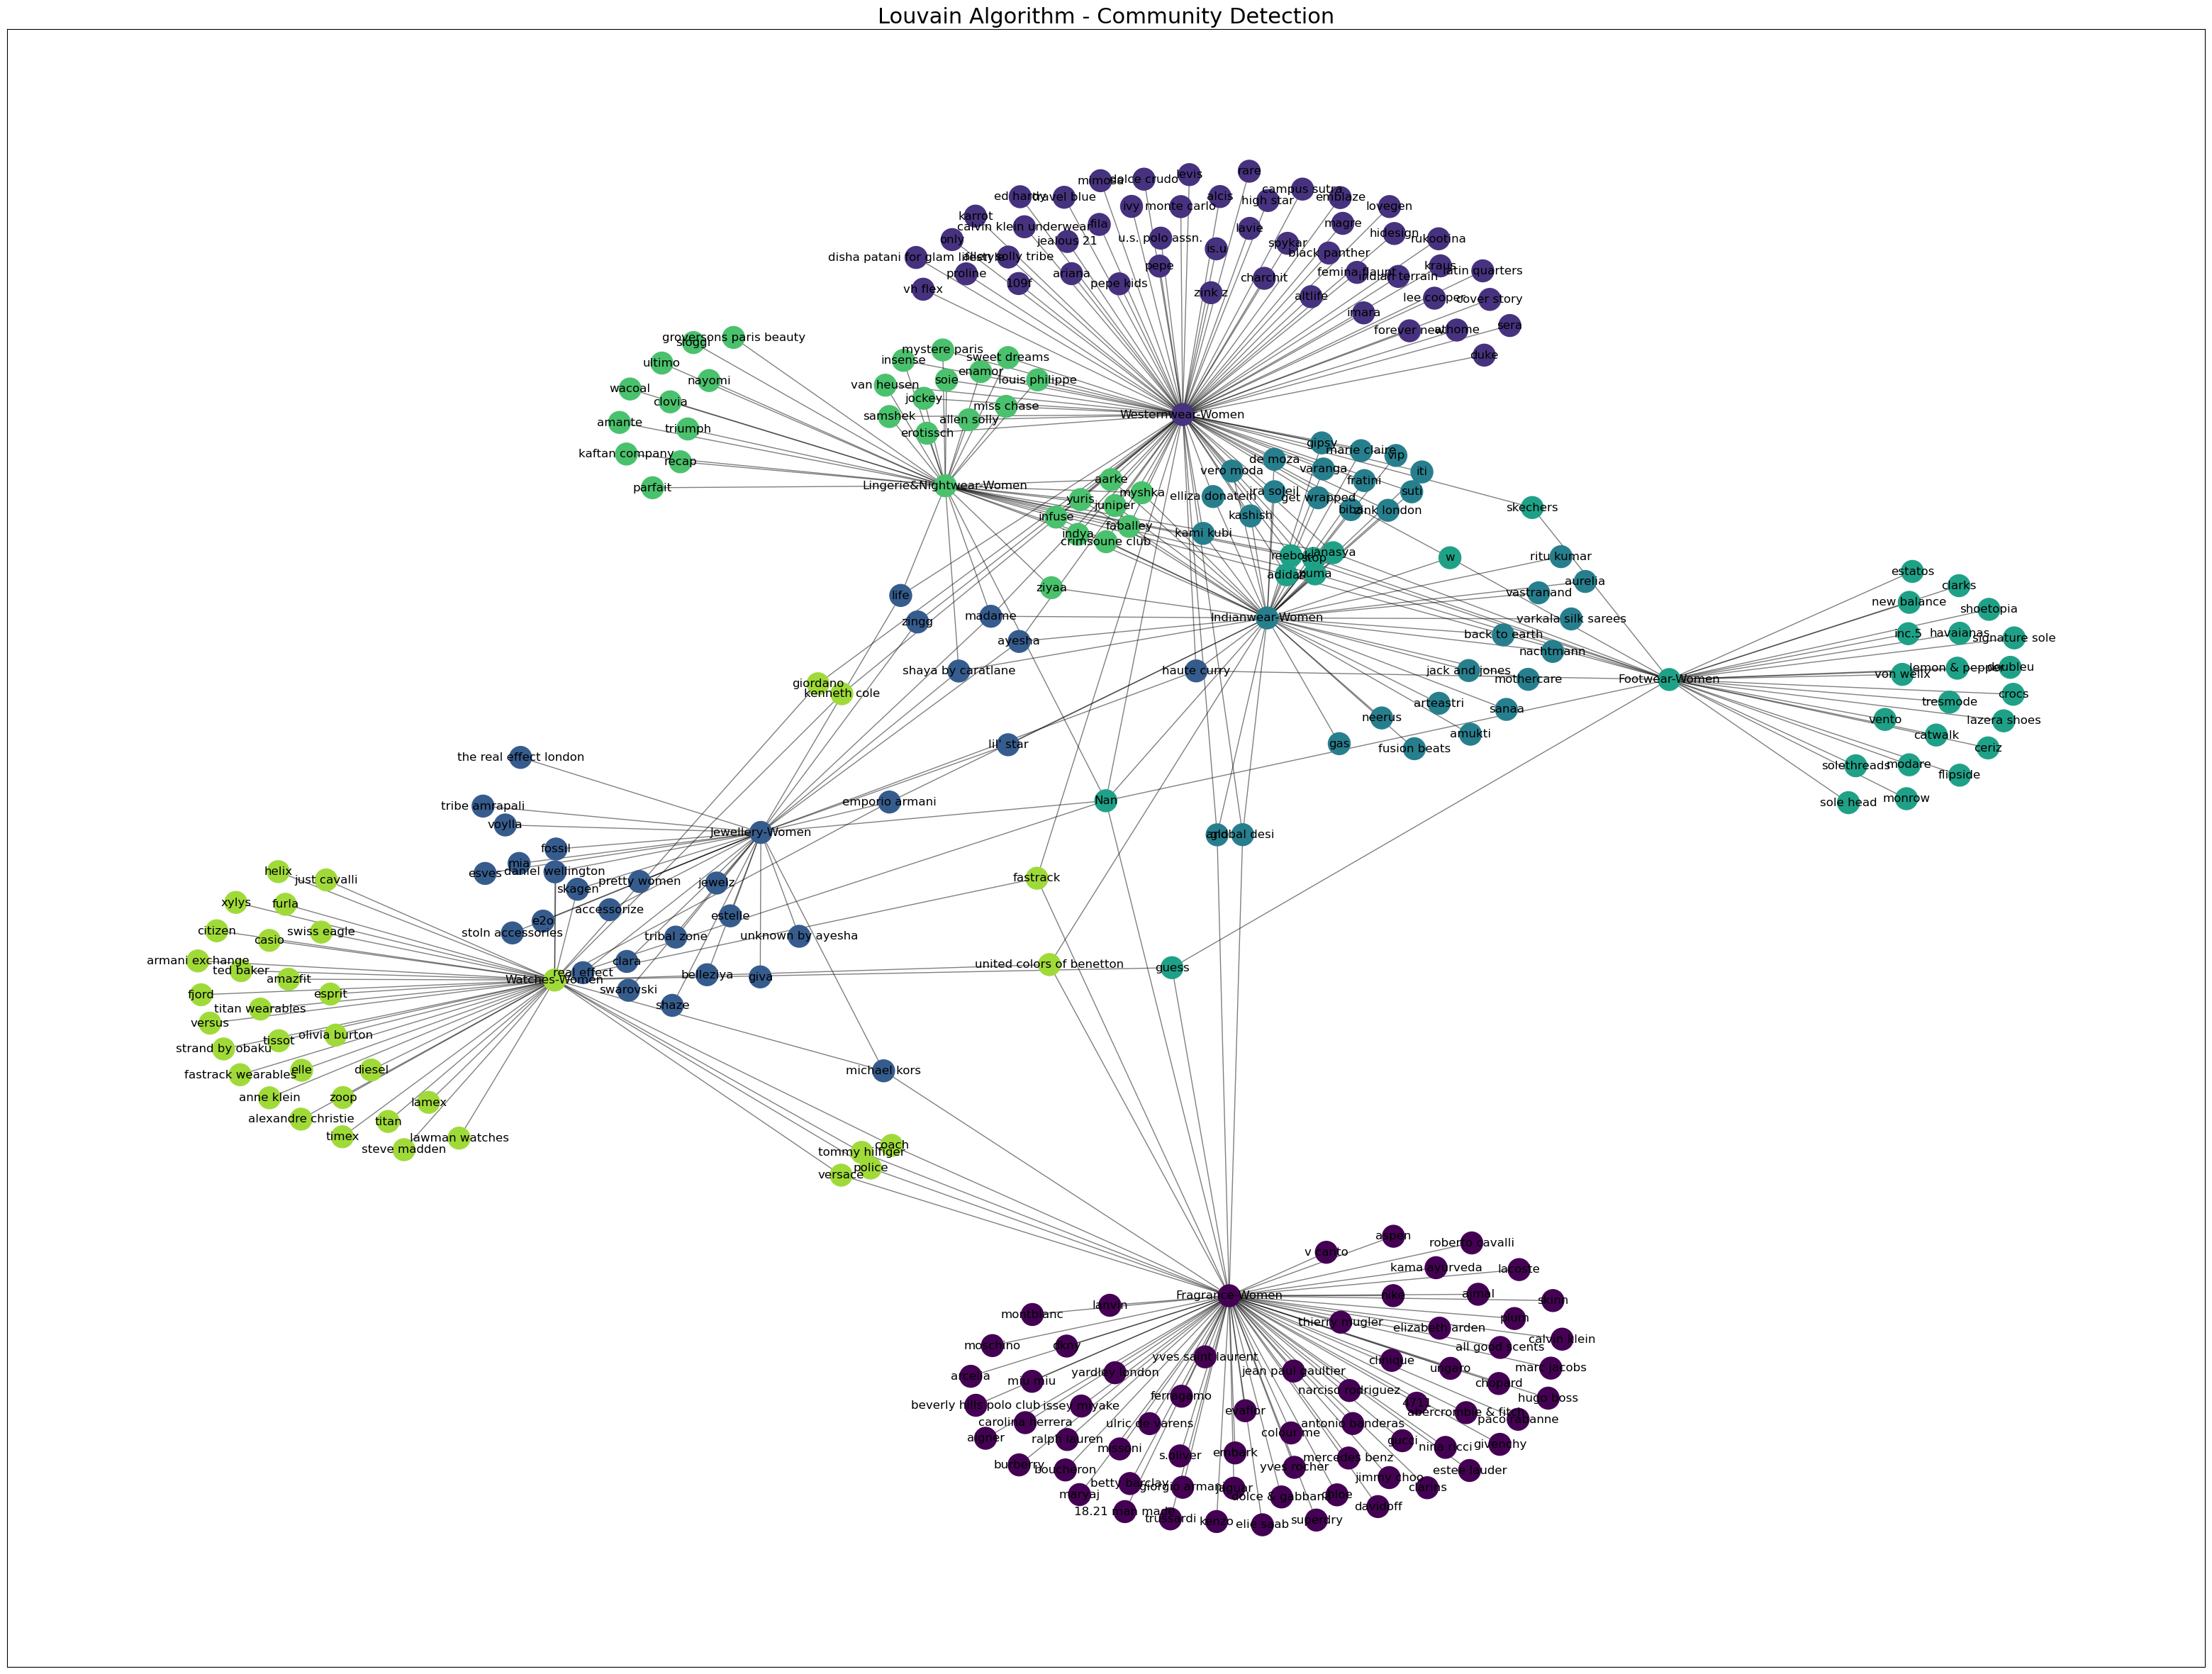

In [25]:
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
unique_communities = set(partition.values())
colors = [cmap(i / len(unique_communities)) for i in range(len(unique_communities))]
node_color = [colors[partition[node]] for node in G.nodes()]

plt.figure(figsize=(40, 30))
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={node: str(node) for node in G.nodes()}, font_size=12, font_color='black')
plt.title("Louvain Algorithm - Community Detection", fontsize=22)
plt.show()

### 3. Implement the Girvan-Newman Algorithm
The Girvan-Newman algorithm works by **iteratively removing edges with the highest betweenness centrality** to separate the network into distinct communities.

##### Function to find the edge with the highest betweenness centrality
This function is designed to identify and return the edge in the graph g with the highest betweenness centrality, which is a key step in the Girvan-Newman algorithm.

In [33]:
def edge_to_remove(g): 
    d1 = nx.edge_betweenness_centrality(g) 
    sorted_list = sorted(d1.items(), key=lambda x: x[1], reverse=True) 
    return sorted_list[0][0]

##### Girvan-Newman algorithm to remove edges and find communities
This function implements the **Girvan-Newman algorithm**, which is used for **detecting communities in a graph** by iteratively removing edges with the **highest betweenness centrality** until the graph breaks into **multiple connected components**. 

In [36]:
def girvan(g): 
    while len(list(nx.connected_components(g))) == 1: 
        u, v = edge_to_remove(g) 
        g.remove_edge(u, v) 
    return list(nx.connected_components(g))

##### Apply the Girvan-Newman algorithm

In [39]:
components = girvan(G)

##### Extract and print the detected communities
Extracts the individual communities and prints them.

In [41]:
components_list = [list(component) for component in components]
print("Girvan-Newman Algorithm - Communities:", components_list)

Girvan-Newman Algorithm - Communities: [['fratini', 'kraus', 'jealous 21', 'the real effect london', 'inc.5', 'jockey', 'w', 'ziyaa', 'ultimo', 'swarovski', 'ivy', 'madame', 'doubleu', 'levis', 'estatos', 'clarks', 'dolce crudo', 'janasya', 'hidesign', 'van heusen', 'ariana', 'shaya by caratlane', 'biba', 'enamor', 'havaianas', 'forever new', 'nayomi', 'is.u', 'sweet dreams', 'lavie', 'travel blue', 'vastranand', 'Lingerie&Nightwear-Women', 'sloggi', 'jewelz', 'back to earth', 'arteastri', '109f', 'proline', 'indian terrain', 'amante', 'solethreads', 'giva', 'athome', 'myshka', 'erotissch', 'kaftan company', 'parfait', 'puma', 'suti', 'lemon & pepper', 'modare', 'allen solly', 'yuris', 'duke', 'ritu kumar', 'reebok', 'tribal zone', 'insense', 'global desi', 'catwalk', 'clovia', 'magre', 'zink z', 'wacoal', 'lee cooper', 'haute curry', 'elliza donatein', 'zingg', 'samshek', 'imara', 'disha patani for glam lifestyle', "lil' star", 'signature sole', 'ceriz', 'triumph', 'faballey', 'cover 

### 4. Visualize the Communities Found by Girvan-Newman Algorithm

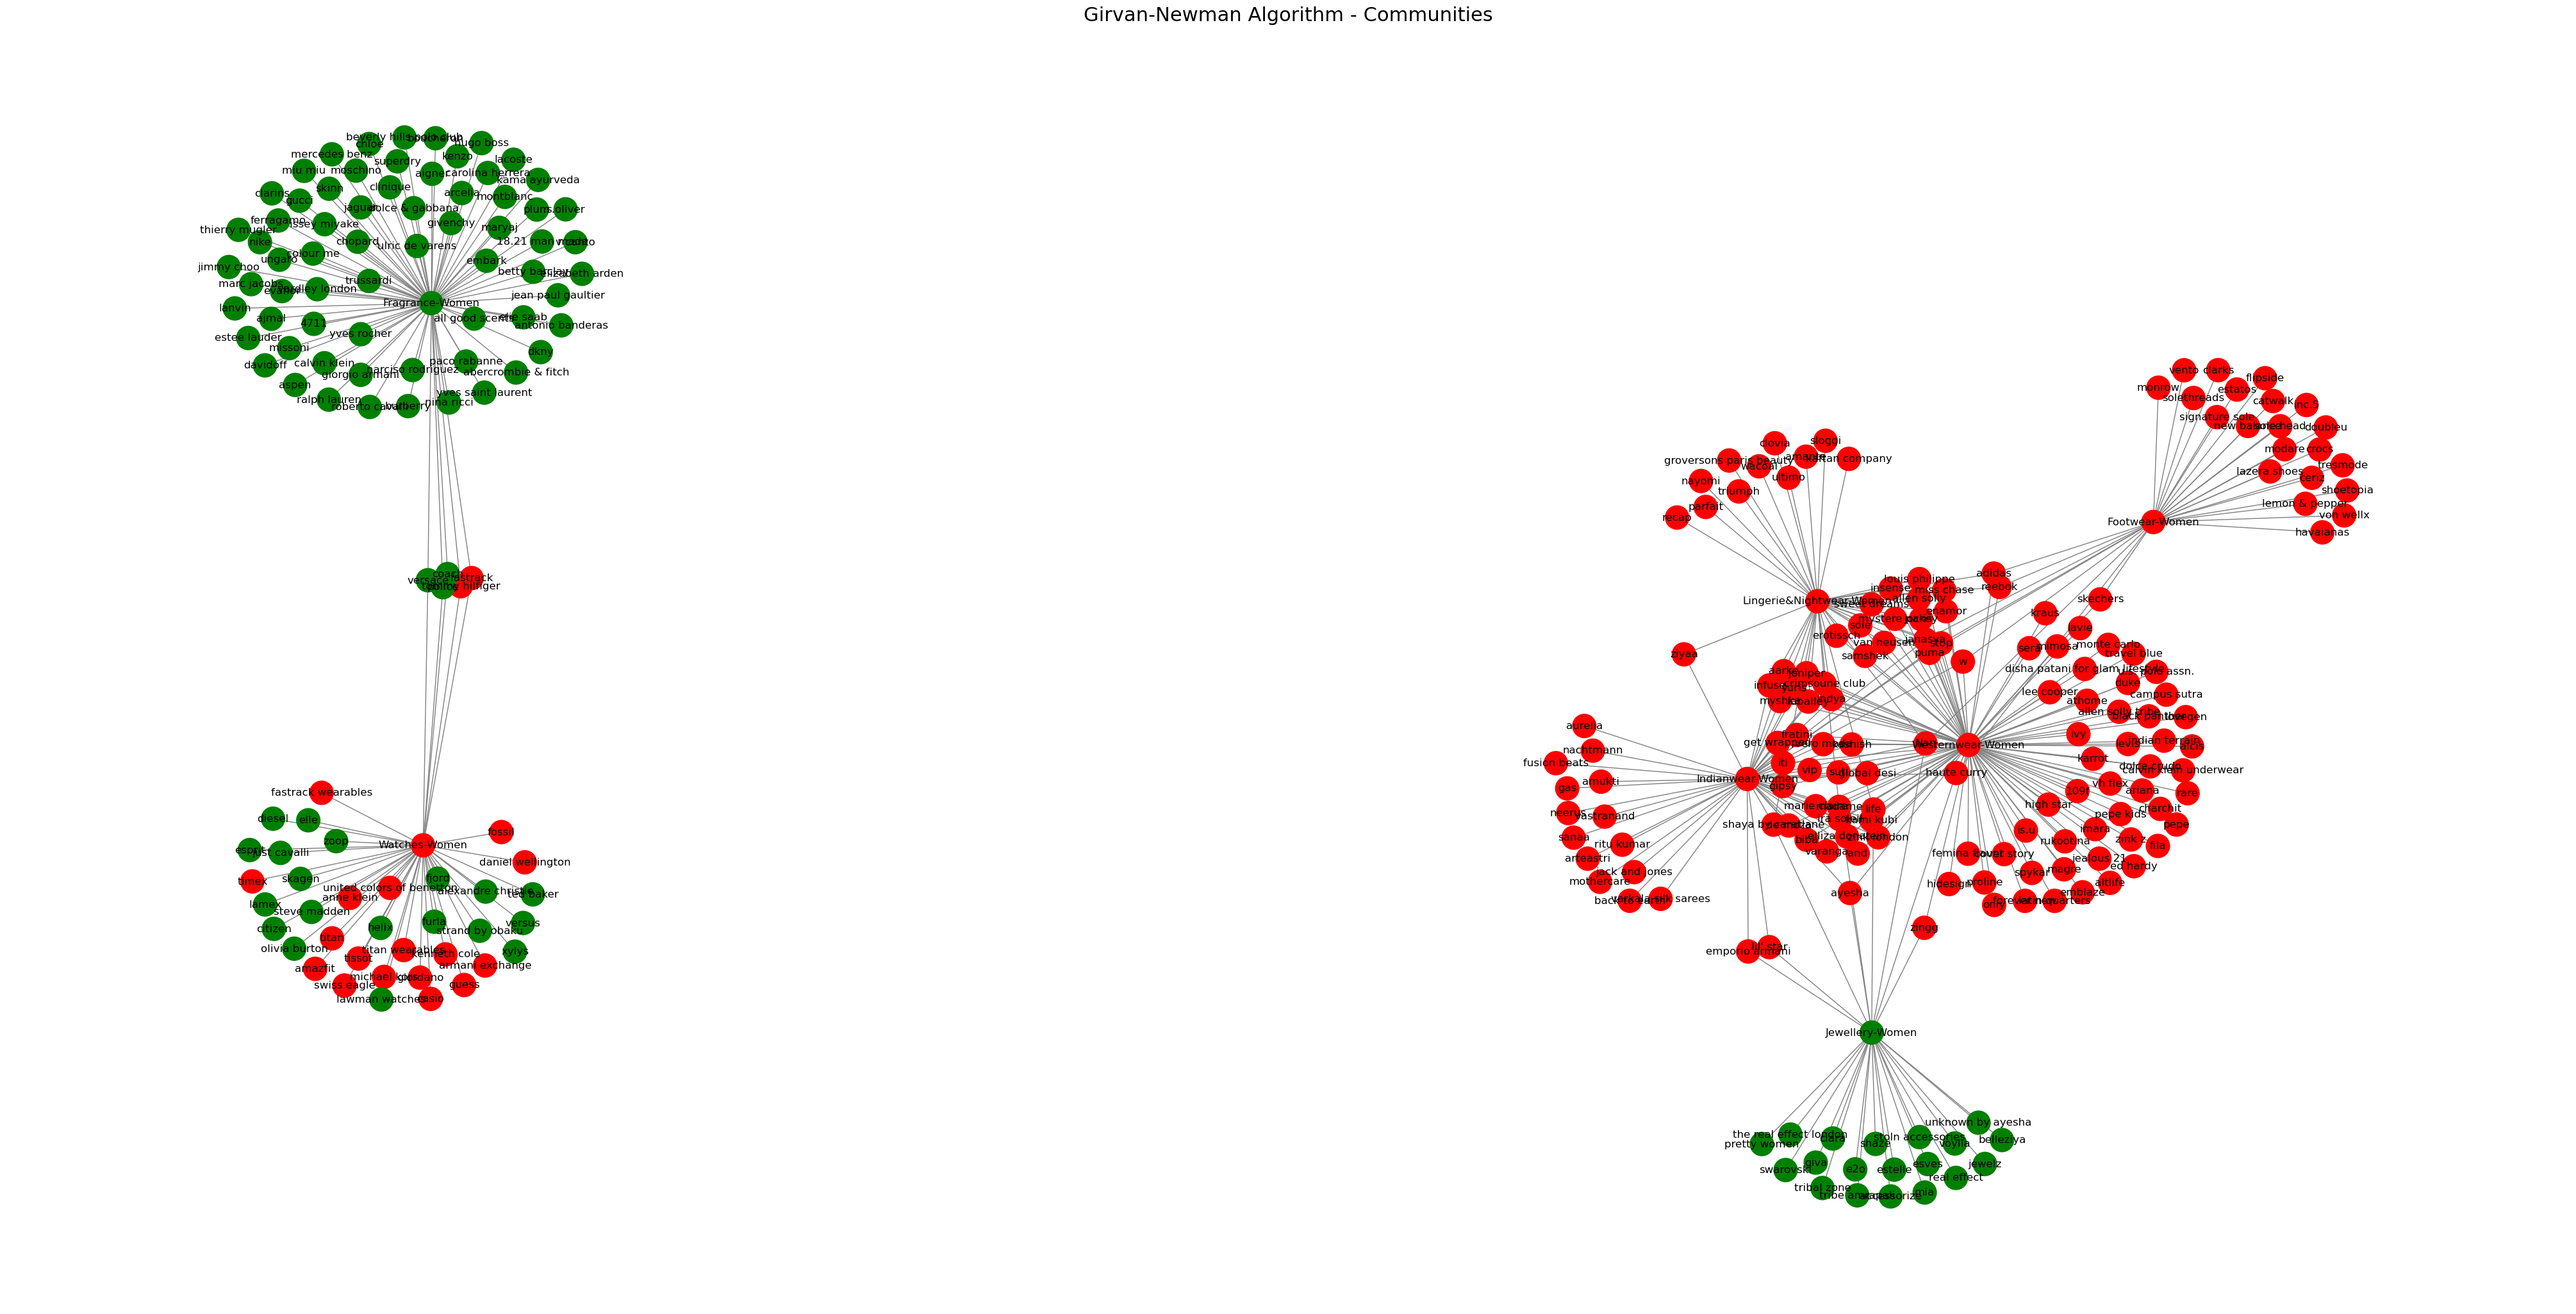

In [43]:
def draw_graph(g, components):
    color_map = []
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']  # Add more colors if necessary
    pos = nx.spring_layout(g, seed=42)  # Seed for reproducibility

    for idx, component in enumerate(components):
        for node in component:
            color_map.append(colors[idx % len(colors)])  # Cycle through colors if more than available

    plt.figure(figsize=(40, 20))
    nx.draw(g, pos, node_color=color_map, with_labels=True, node_size=700, font_size=12, edge_color='grey')
    plt.title("Girvan-Newman Algorithm - Communities", fontsize=22)
    plt.show()

# Visualize the graph after applying the Girvan-Newman algorithm
draw_graph(G, components_list)

In [44]:
# Calculate modularity for Louvain partition
modularity_louvain = community_louvain.modularity(partition, G)
print(f"Louvain Modularity: {modularity_louvain}")

Louvain Modularity: 0.5936441195323708


### Insights
The modularity score ranges from -1 to 1. A higher value (closer to 1) indicates a **strong community structure**. In this case, a modularity score of approximately 0.594 suggests that the partitioning achieved by the Louvain algorithm has a fairly strong community structure where nodes within the same community are more densely connected than those across communities.